In [4]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

df = pd.read_csv('D:\EDUCATION\Internship_DataScience\Task_1\Data_Exploration_and_Cleaning\cleaned_data.csv')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)
df['default payment next month'].mean()

0.2217971797179718

In [2]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [41]:
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173051, 0.4157029 , 0.2039552 , ..., 0.4157029 , 0.17278475,
       0.33606547])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [43]:
model.score(X_test, y_test)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

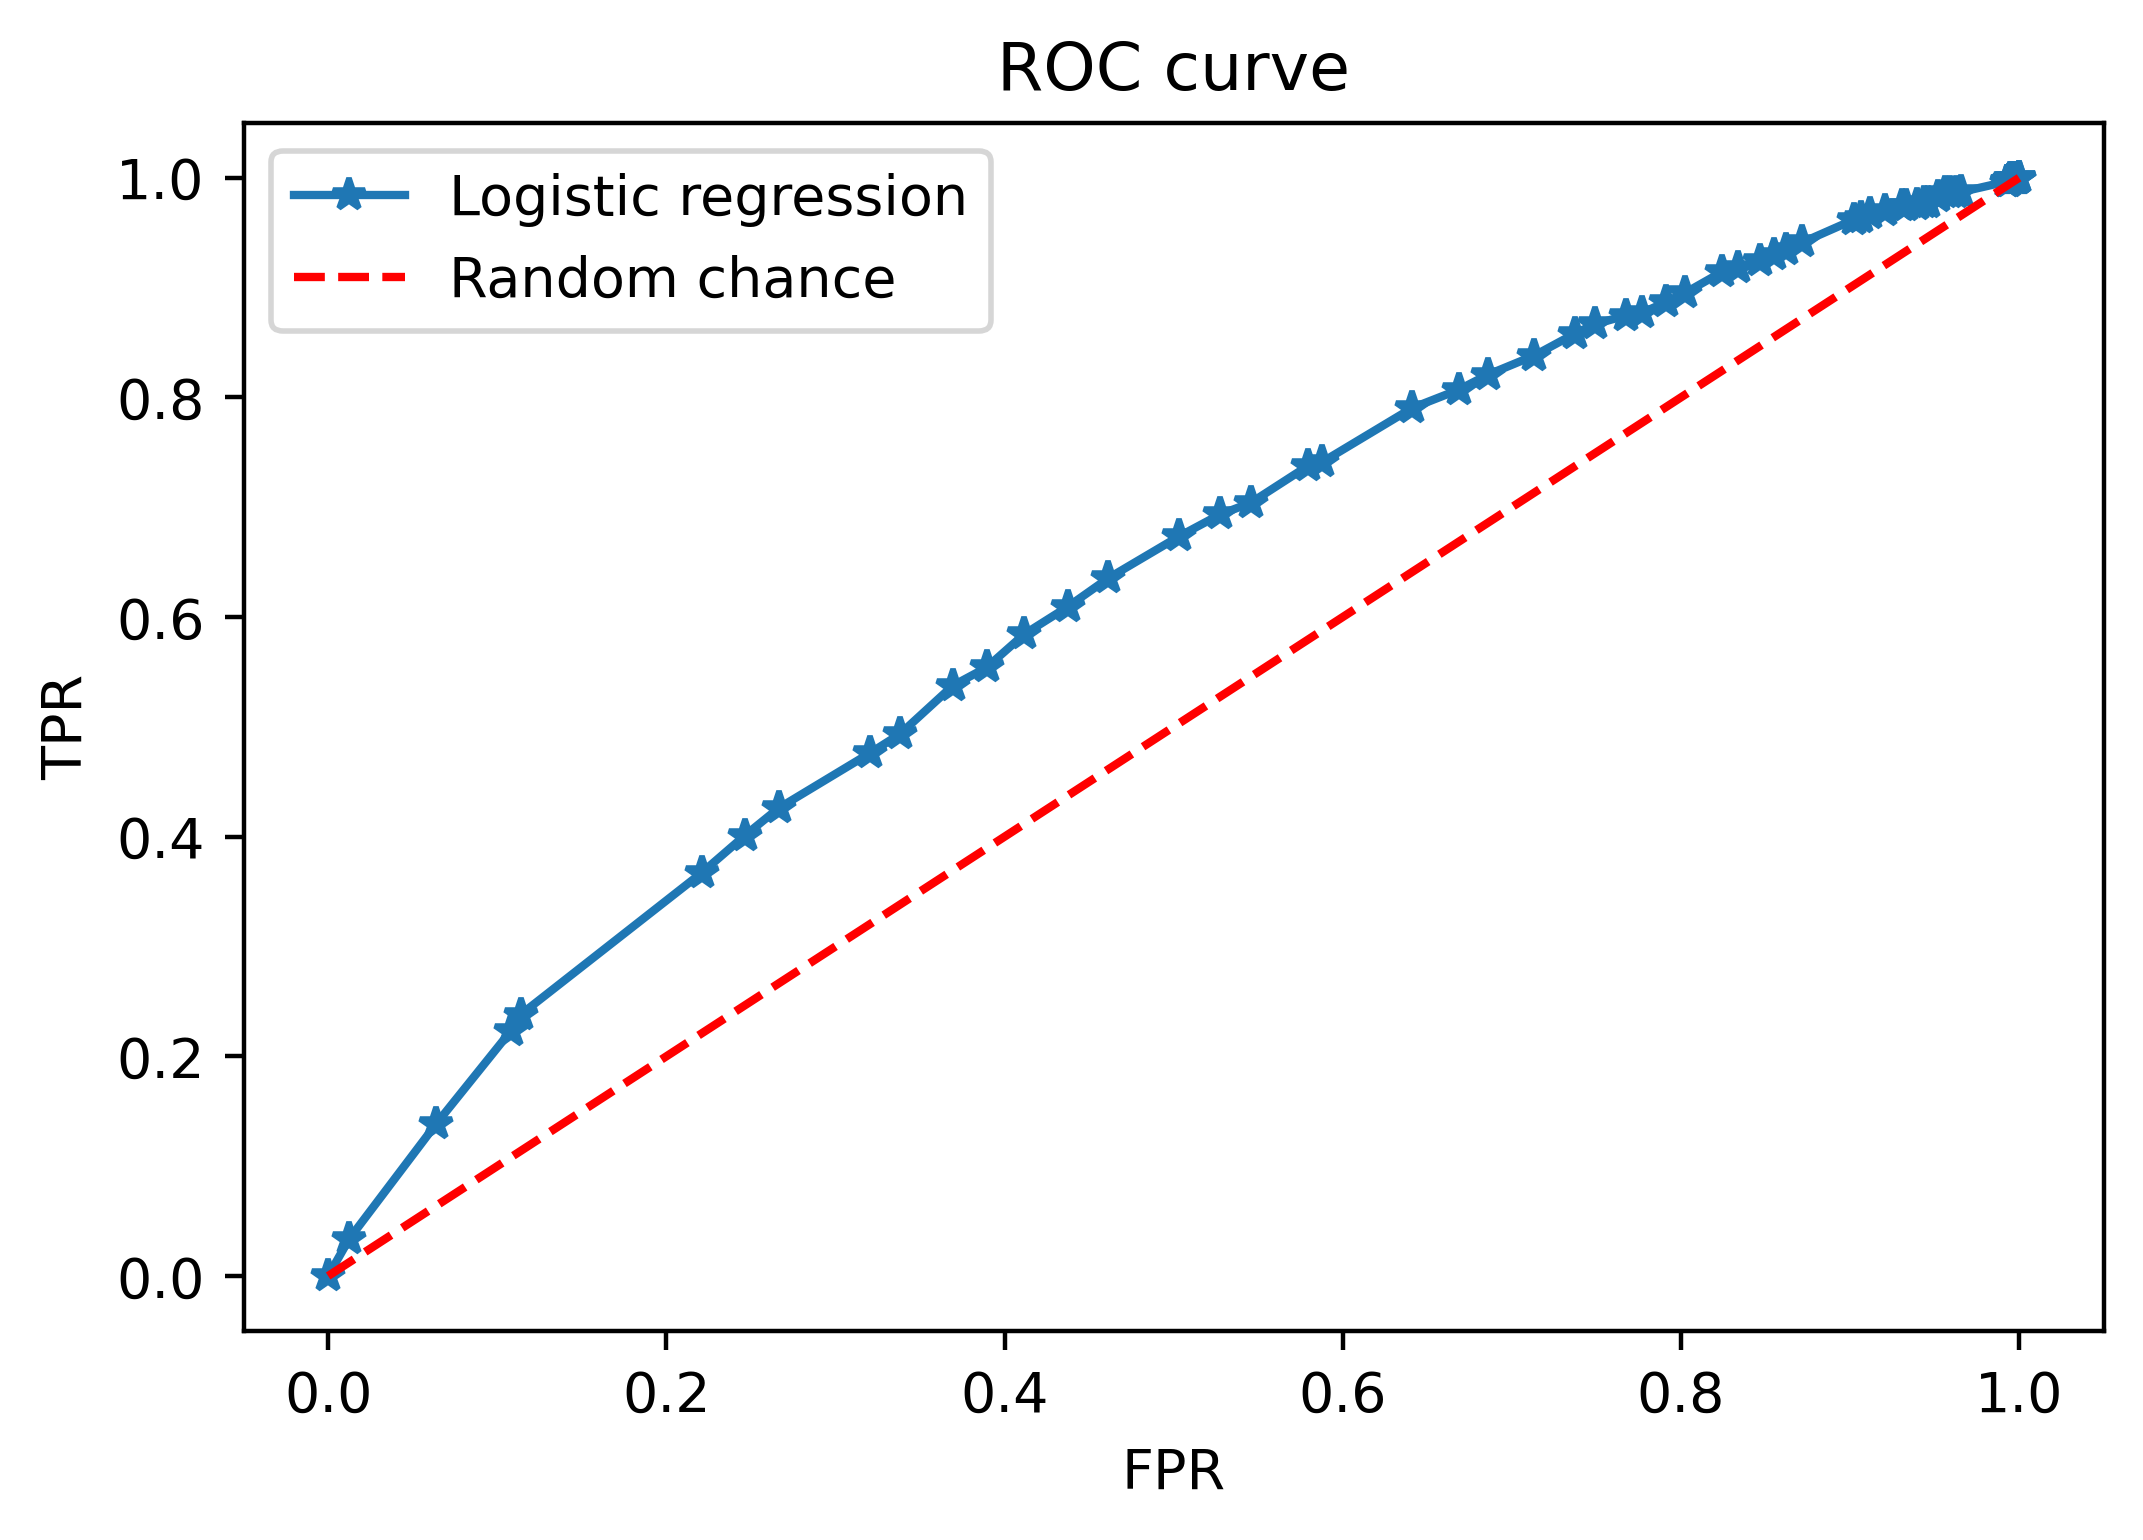

In [44]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [47]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)

(array([0.21661665, 0.21651032, 0.21663225, 0.21667293, 0.21671362,
        0.21687653, 0.21695807, 0.21712135, 0.21724398, 0.21728488,
        0.2173258 , 0.21715363, 0.21719457, 0.21704695, 0.21716981,
        0.21725179, 0.22033243, 0.22073643, 0.22129396, 0.22189753,
        0.22198318, 0.22200354, 0.22244133, 0.22283792, 0.22392516,
        0.22441652, 0.22553363, 0.22670997, 0.22714286, 0.22761729,
        0.22985832, 0.2305063 , 0.23116659, 0.231755  , 0.23327465,
        0.23466667, 0.23569638, 0.23654424, 0.23784926, 0.23956357,
        0.24237288, 0.24342913, 0.24518744, 0.24855794, 0.25020134,
        0.25417595, 0.25845411, 0.26031164, 0.26293661, 0.26655574,
        0.27004512, 0.27573253, 0.27804107, 0.28183716, 0.28231142,
        0.28683603, 0.28744327, 0.29115934, 0.30654206, 0.31032172,
        0.31477357, 0.36617843, 0.36338028, 0.37470726, 0.42857143,
        1.        ]),
 array([1.        , 0.9991342 , 0.9991342 , 0.9991342 , 0.9991342 ,
        0.9991342 , 0.9991

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0, 0.5, 'recall')

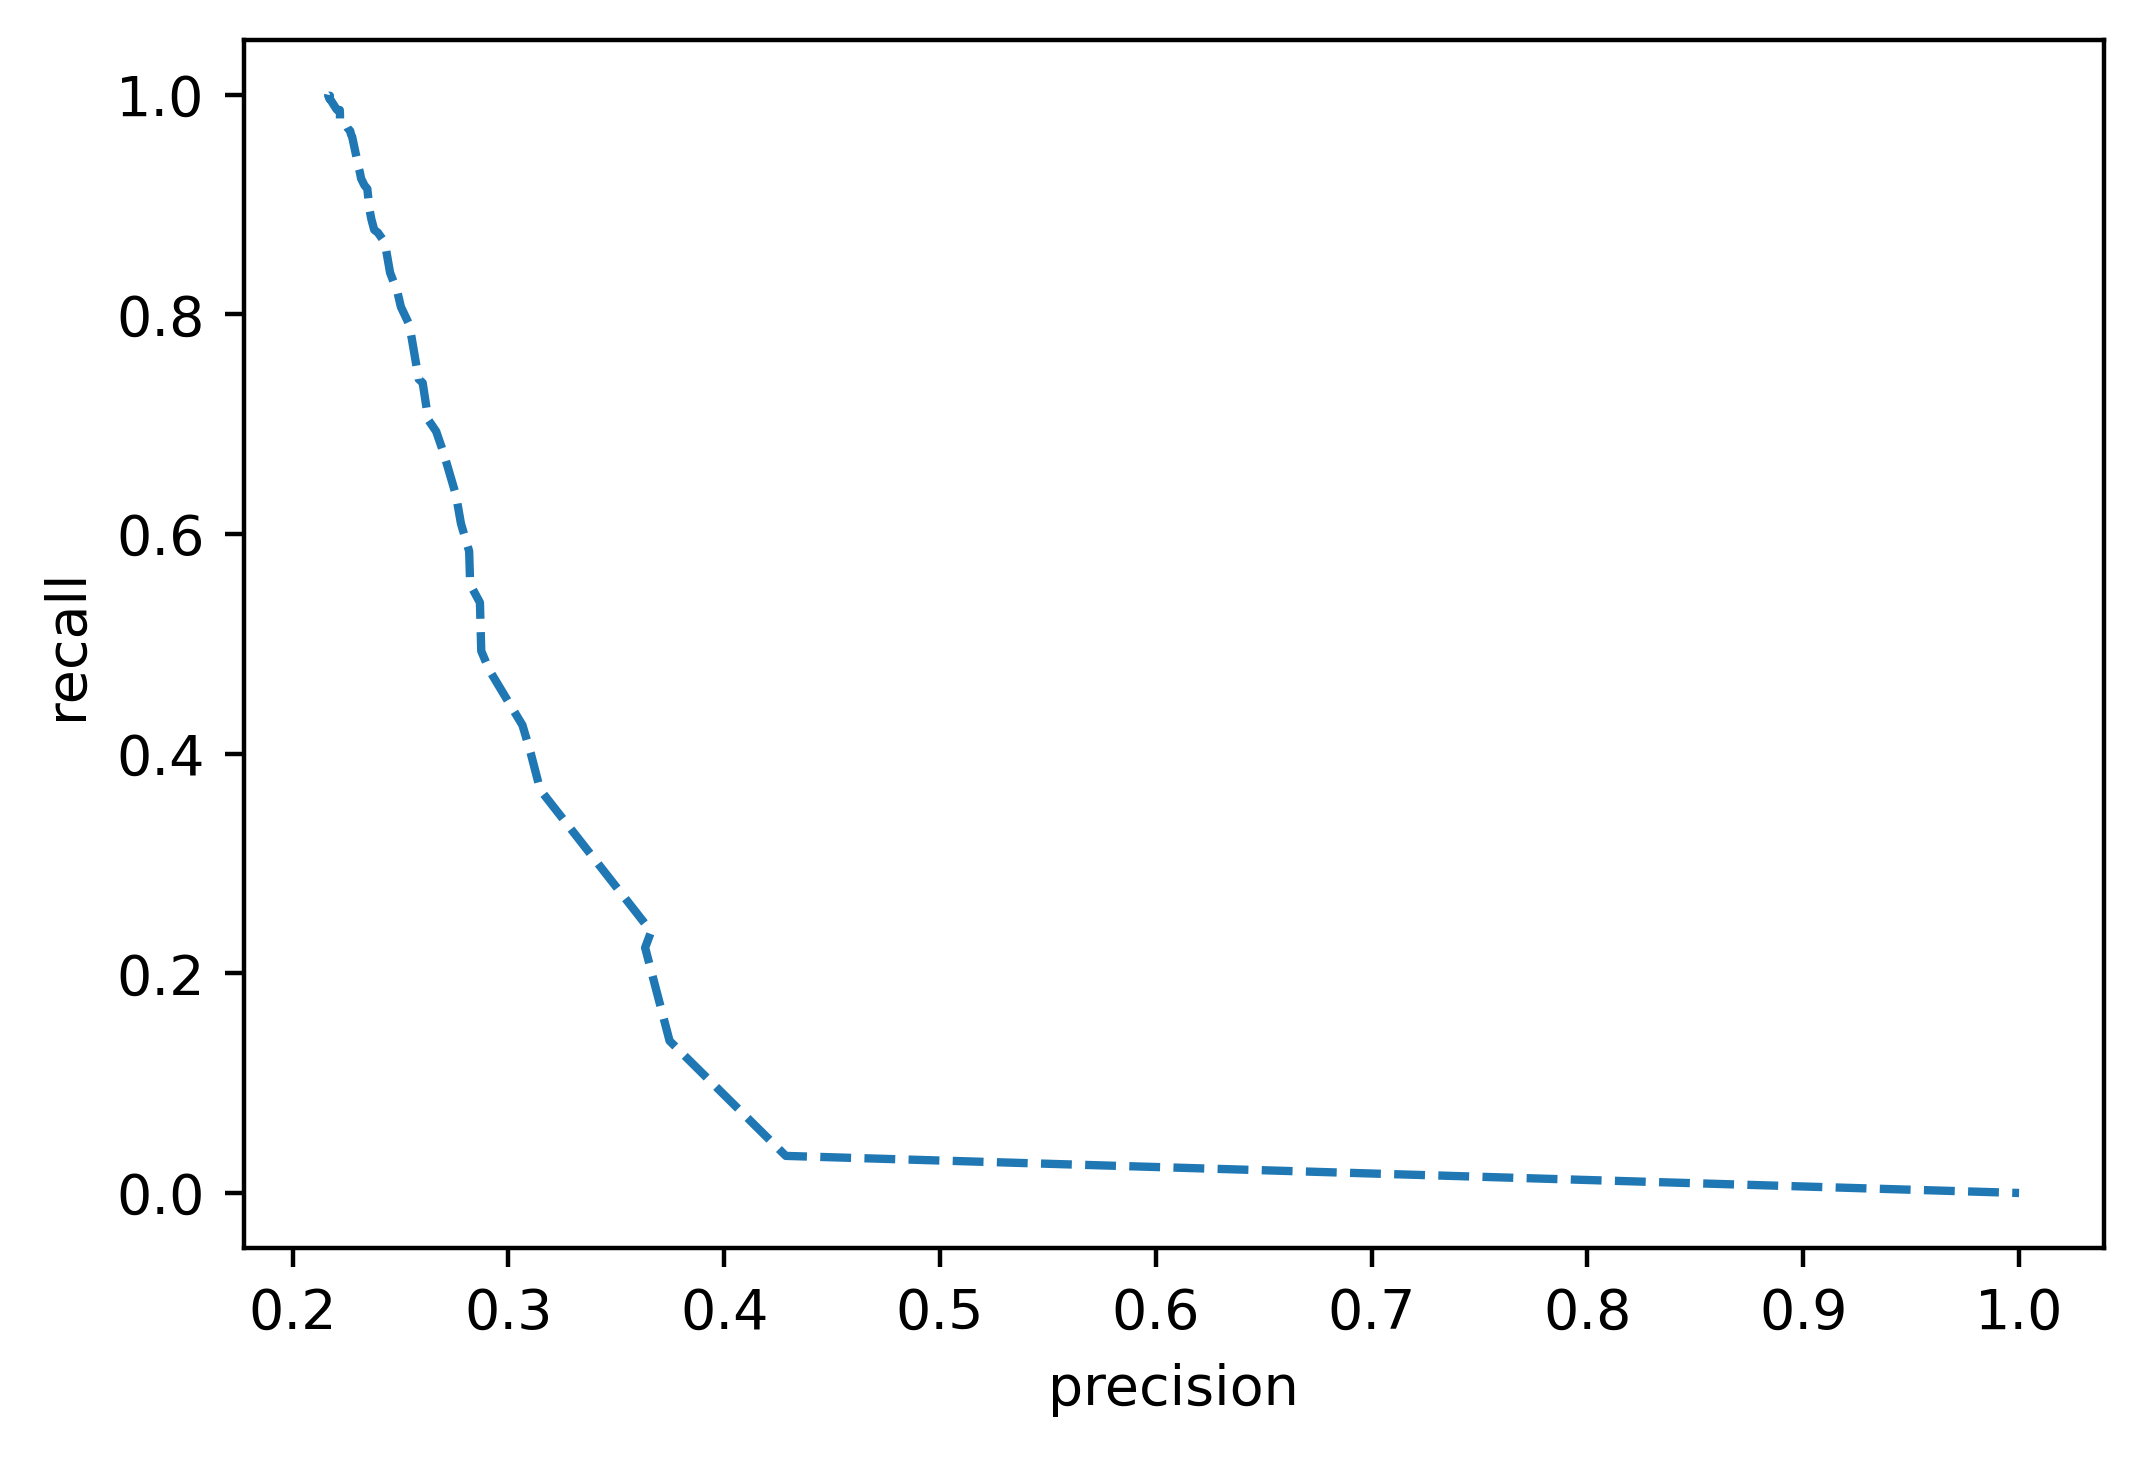

In [49]:
plt.plot(precision, recall, linestyle='--')
# axis labels
plt.xlabel('precision')
plt.ylabel('recall')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [50]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [52]:
model.score(X_train, y_train)

0.776897473161127

    How is this different, conceptually and quantitatively, from your earlier calculation?
